In [ ]:
#Mount the google drive connection to our dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Tensorflow Notes/datasets/housing.csv')

In [ ]:
df.head()

,Unnamed: 0,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [ ]:
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

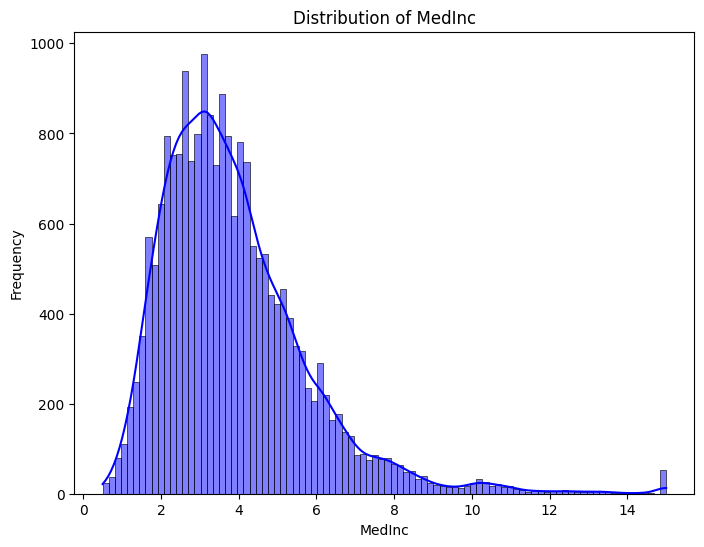

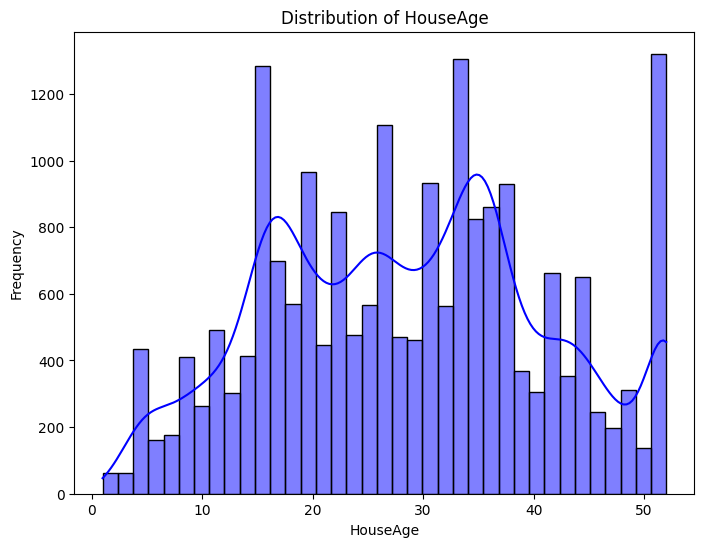

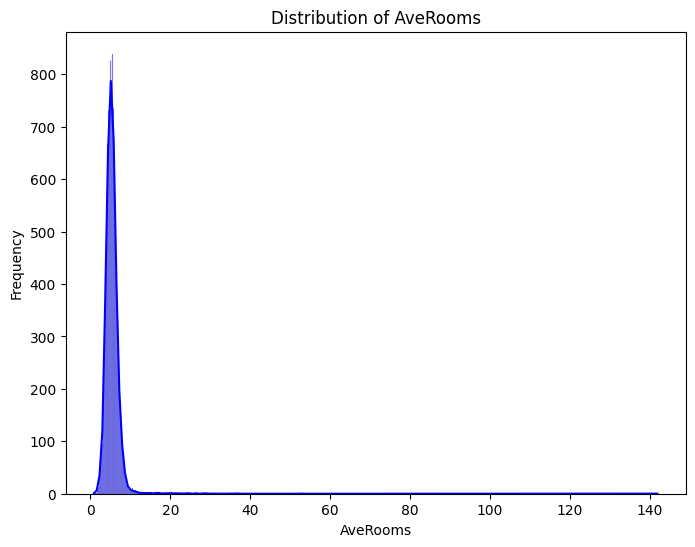

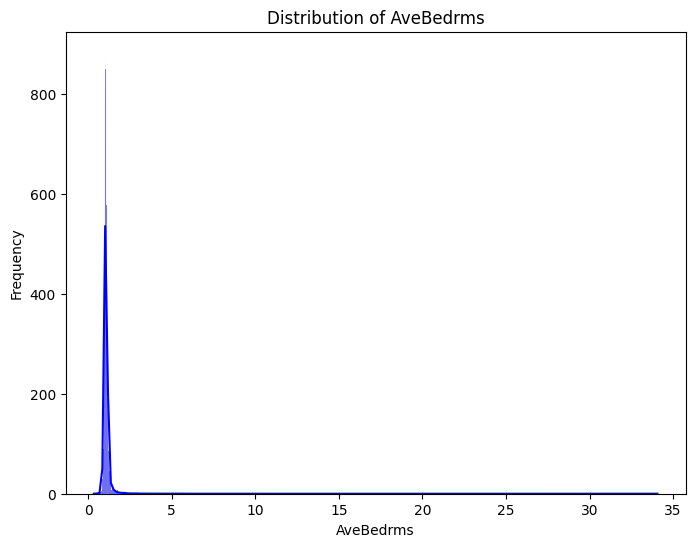

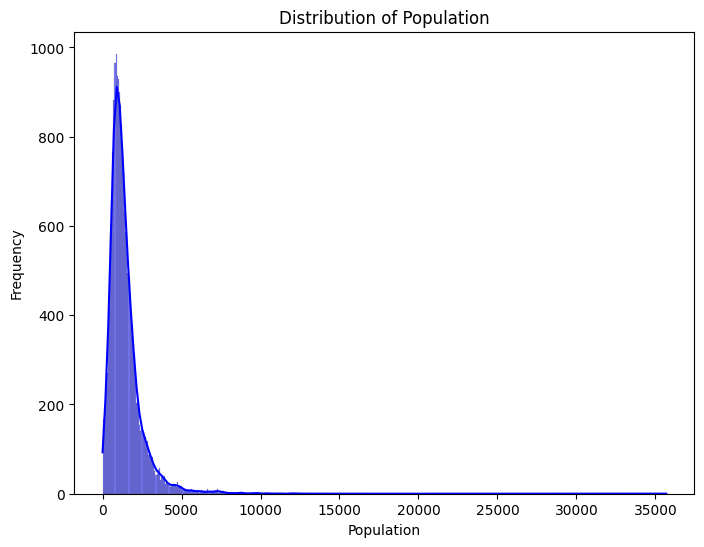

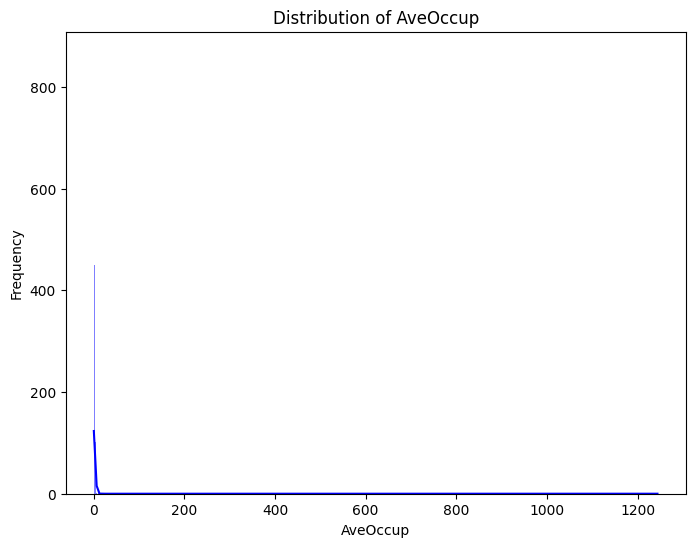

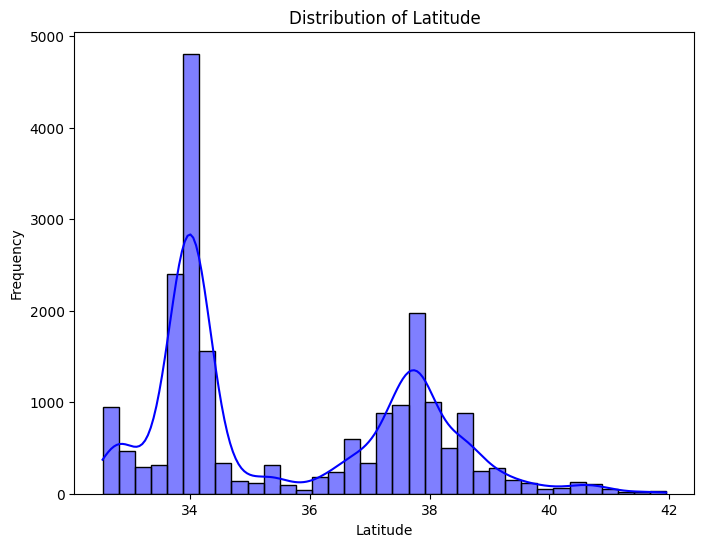

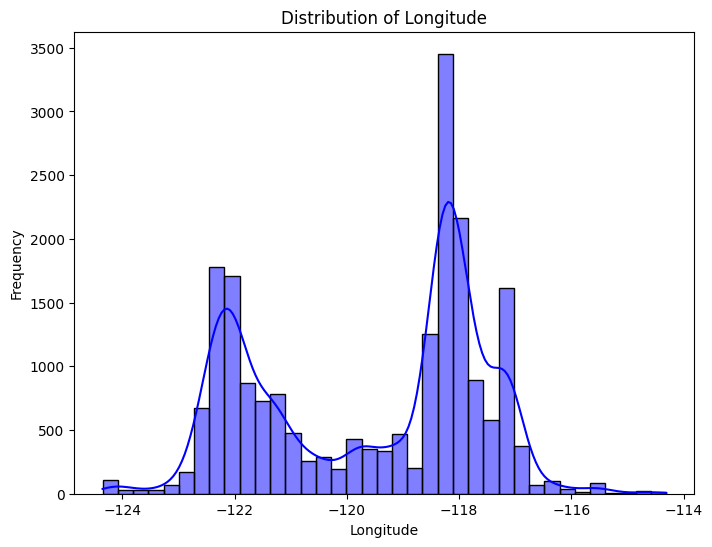

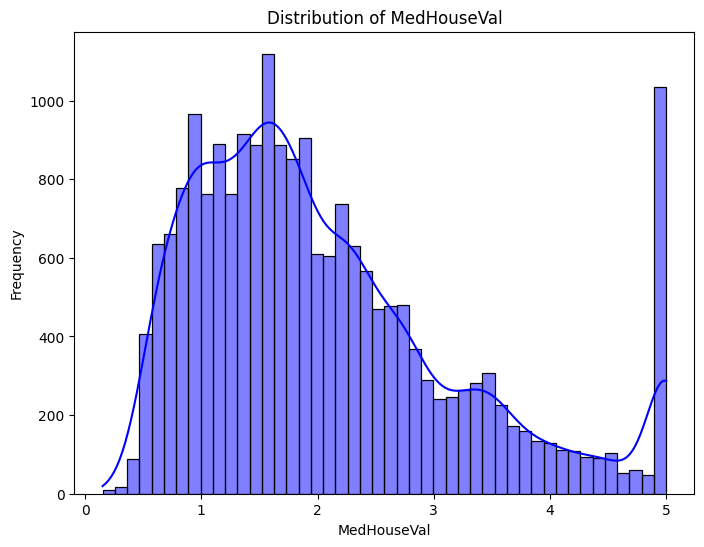

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_charts(df):
  # Numeric features
  numeric_features = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
  for feature in numeric_features:
      plt.figure(figsize=(8, 6))
      sns.histplot(df[feature], kde=True, color='blue')
      plt.title(f'Distribution of {feature}')
      plt.xlabel(feature)
      plt.ylabel('Frequency')
      plt.show()

plot_charts(df)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [ ]:
X = df_scaled.drop("MedHouseVal", axis=1)
y = df_scaled["MedHouseVal"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
import tensorflow as tf

# Create the model with Sequential API using .add method
model = tf.keras.Sequential(name="Model_1")
model.add(tf.keras.Input(shape=(8,)))  # The input layer
model.add(tf.keras.layers.Dense(200, activation='relu'))  # The hidden layer
model.add(tf.keras.layers.Dense(200, activation='relu'))  # The hidden layer
model.add(tf.keras.layers.Dense(1, activation=None))  # The output layer

# Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Assuming X_tensor and y_tensor are your input and target tensors
# Fit the model
model.fit(X_train, y_train, epochs=400)

Epoch 1/400
387/387 [==============================] - 1s 2ms/step - loss: 0.5230 - mae: 0.5230
Epoch 2/400
387/387 [==============================] - 1s 2ms/step - loss: 0.4293 - mae: 0.4293
Epoch 3/400
387/387 [==============================] - 1s 2ms/step - loss: 0.4078 - mae: 0.4078
Epoch 4/400
387/387 [==============================] - 1s 2ms/step - loss: 0.3958 - mae: 0.3958
Epoch 5/400
387/387 [==============================] - 1s 2ms/step - loss: 0.3877 - mae: 0.3877
Epoch 6/400
387/387 [==============================] - 1s 2ms/step - loss: 0.3798 - mae: 0.3798
Epoch 7/400
387/387 [==============================] - 1s 2ms/step - loss: 0.3746 - mae: 0.3746
Epoch 8/400
387/387 [==============================] - 1s 3ms/step - loss: 0.3698 - mae: 0.3698
Epoch 9/400
387/387 [==============================] - 1s 3ms/step - loss: 0.3656 - mae: 0.3656
Epoch 10/400
387/387 [==============================] - 1s 3ms/step - loss: 0.3615 - mae: 0.3615
Epoch 11/400
387/387 [=================

In [ ]:
model.evaluate(X_val, y_val)

129/129 [==============================] - 0s 2ms/step - loss: 0.2937 - mae: 0.2937


[0.2937038540840149, 0.2937038540840149]

In [ ]:
model.evaluate(X_test, y_test)

129/129 [==============================] - 0s 2ms/step - loss: 0.2872 - mae: 0.2872


[0.28721705079078674, 0.28721705079078674]

In [ ]:
model.summary()

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 200)               1800      
                                                                 
 dense_14 (Dense)            (None, 200)               40200     
                                                                 
 dense_15 (Dense)            (None, 1)                 201       
                                                                 
Total params: 42201 (164.85 KB)
Trainable params: 42201 (164.85 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
X_val.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
19969,-1.046371,0.743768,-0.273431,0.075596,0.165593,0.092612,0.270677,0.239435
1498,1.957667,-0.289187,1.014958,-0.197681,-0.320969,0.010494,1.075958,-1.218026
12725,-0.574737,-0.130270,-0.122939,-0.162406,0.109078,-0.099672,1.394324,-0.888600
18498,0.080604,-0.765935,0.432329,-0.036343,-0.250325,0.005595,0.649908,-0.968461
2734,-0.348657,0.425936,0.017083,-0.070599,0.177956,0.004449,-1.335203,2.001367


In [ ]:
y_val.tail()

19969   -1.406117
1498     1.068907
12725   -0.789961
18498    1.453680
2734    -1.132270
Name: MedHouseVal, dtype: float64

In [ ]:
X_val.iloc[-1]

MedInc       -0.348657
HouseAge      0.425936
AveRooms      0.017083
AveBedrms    -0.070599
Population    0.177956
AveOccup      0.004449
Latitude     -1.335203
Longitude     2.001367
Name: 2734, dtype: float64

In [ ]:
reshaped_input = X_val.iloc[-1].values.reshape(1, -1)

In [ ]:
reshaped_input

array([[-0.34865748,  0.42593611,  0.01708274, -0.07059887,  0.17795574,
         0.00444868, -1.33520322,  2.00136666]])

In [ ]:
model.predict(reshaped_input)

1/1 [==============================] - 0s 65ms/step


array([[-0.92279744]], dtype=float32)

#Let's try new experiments:
2. Reduce the number of hidden layers
3. Train less
4. Increase the number of hidden units
5. Use MSE

In [ ]:
import tensorflow as tf

# Create the model with Sequential API using .add method
model2 = tf.keras.Sequential(name="Model_2")
model2.add(tf.keras.Input(shape=(8,)))  # The input layer
model2.add(tf.keras.layers.Dense(200, activation='relu'))  # The hidden layer
model2.add(tf.keras.layers.Dense(1, activation=None))  # The output layer

# Compile the model
model2.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Assuming X_tensor and y_tensor are your input and target tensors
# Fit the model
model2.fit(X_train, y_train, epochs=400, verbose=0)

In [ ]:
model2.evaluate(X_val, y_val)

129/129 [==============================] - 0s 2ms/step - loss: 0.3163 - mae: 0.3163


[0.3163195848464966, 0.3163195848464966]

In [ ]:
model2.evaluate(X_test, y_test)

129/129 [==============================] - 0s 2ms/step - loss: 0.3078 - mae: 0.3078


[0.3078433871269226, 0.3078433871269226]

In [ ]:
model2.predict(reshaped_input)

1/1 [==============================] - 0s 66ms/step


array([[-1.1648092]], dtype=float32)

In [ ]:
import tensorflow as tf

# Create the model with Sequential API using .add method
model3 = tf.keras.Sequential(name="Model_3")
model3.add(tf.keras.Input(shape=(8,)))  # The input layer
model3.add(tf.keras.layers.Dense(200, activation='relu'))  # The hidden layer
model3.add(tf.keras.layers.Dense(1, activation=None))  # The output layer

# Compile the model
model3.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model
model3.fit(X_train, y_train, epochs=200, verbose=0)

In [ ]:
model3.evaluate(X_val, y_val)

129/129 [==============================] - 0s 3ms/step - loss: 0.3268 - mae: 0.3268


[0.32683613896369934, 0.32683613896369934]

In [ ]:
model3.evaluate(X_test, y_test)

129/129 [==============================] - 0s 1ms/step - loss: 0.3212 - mae: 0.3212


[0.3212066888809204, 0.3212066888809204]

In [ ]:
model3.predict(reshaped_input)

1/1 [==============================] - 0s 140ms/step


array([[-1.3842154]], dtype=float32)

In [ ]:
import tensorflow as tf

# Create the model with Sequential API using .add method
model4 = tf.keras.Sequential(name="Model_4")
model4.add(tf.keras.Input(shape=(8,)))  # The input layer
model4.add(tf.keras.layers.Dense(400, activation='relu'))  # The hidden layer
model4.add(tf.keras.layers.Dense(1, activation=None))  # The output layer

# Compile the model
model4.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model
model4.fit(X_train, y_train, epochs=400, verbose=0)

In [ ]:
model4.evaluate(X_val, y_val)

129/129 [==============================] - 1s 5ms/step - loss: 0.3149 - mae: 0.3149


[0.3149292767047882, 0.3149292767047882]

In [ ]:
model4.evaluate(X_test, y_test)

129/129 [==============================] - 0s 2ms/step - loss: 0.3110 - mae: 0.3110


[0.31098127365112305, 0.31098127365112305]

In [ ]:
model4.predict(reshaped_input)

1/1 [==============================] - 0s 73ms/step


array([[-1.2411946]], dtype=float32)

In [ ]:
import tensorflow as tf

# Create the model with Sequential API using .add method
model5 = tf.keras.Sequential(name="Model_4")
model5.add(tf.keras.Input(shape=(8,)))  # The input layer
model5.add(tf.keras.layers.Dense(400, activation='relu'))  # The hidden layer
model5.add(tf.keras.layers.Dense(1, activation=None))  # The output layer

# Compile the model
model5.compile(loss="mse",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mse"])

# Fit the model
model5.fit(X_train, y_train, epochs=400, verbose=0)

In [ ]:
model5.evaluate(X_val, y_val)

129/129 [==============================] - 1s 5ms/step - loss: 0.2226 - mse: 0.2226


[0.2225542515516281, 0.2225542515516281]

In [ ]:
model5.evaluate(X_test, y_test)

129/129 [==============================] - 0s 2ms/step - loss: 0.4085 - mse: 0.4085


[0.4084606468677521, 0.4084606468677521]

In [ ]:
model5.predict(reshaped_input)

1/1 [==============================] - 0s 103ms/step


array([[-1.2154938]], dtype=float32)